### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of heart failure events based on clinical records. You have been provided with a dataset named **`"heart_failure_clinical_records.csv"`** which includes various clinical parameters of patients. The dataset comprises the following columns:

- age: Age of the patient (years)
- anaemia: Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: If the patient has hypertension (boolean)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Sex of the patient (binary, 1 for male, 0 for female)
- smoking: If the patient smokes or not (boolean)
- time: Follow-up period (days)
- death_event: If the patient died during the follow-up period (boolean)

Your task is to use this dataset to build and evaluate machine learning models to predict heart failure events. You will perform data preprocessing, exploratory data analysis, and model training using GaussianNB, SVM, and XGBoost. Additionally, you will use ROC curves to analyze model performance and make cost-benefit decisions.

**Dataset credits:** Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.



**Import Necessary Libraries**

In [18]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Task 1: Data Preprocessing and Exploratory Data Analysis

1. Import the data from the `"heart_failure_clinical_records.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for missing values and handle them appropriately.
5. Perform basic statistical analysis and visualization to understand the distribution of each feature.
    - Use `histograms` for continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time).
    - Use `bar plots` for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).

In [19]:
# Import the data from the "heart_failure_clinical_records.csv" file and store it in a DataFrame.

df = pd.read_csv("heart_failure_clinical_records.csv")

In [20]:
# Display the number of rows and columns in the dataset.

df.shape

(5000, 13)

In [21]:
# Display the first few rows of the dataset to get an overview

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [22]:
# Check for missing values and handle them appropriately.

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

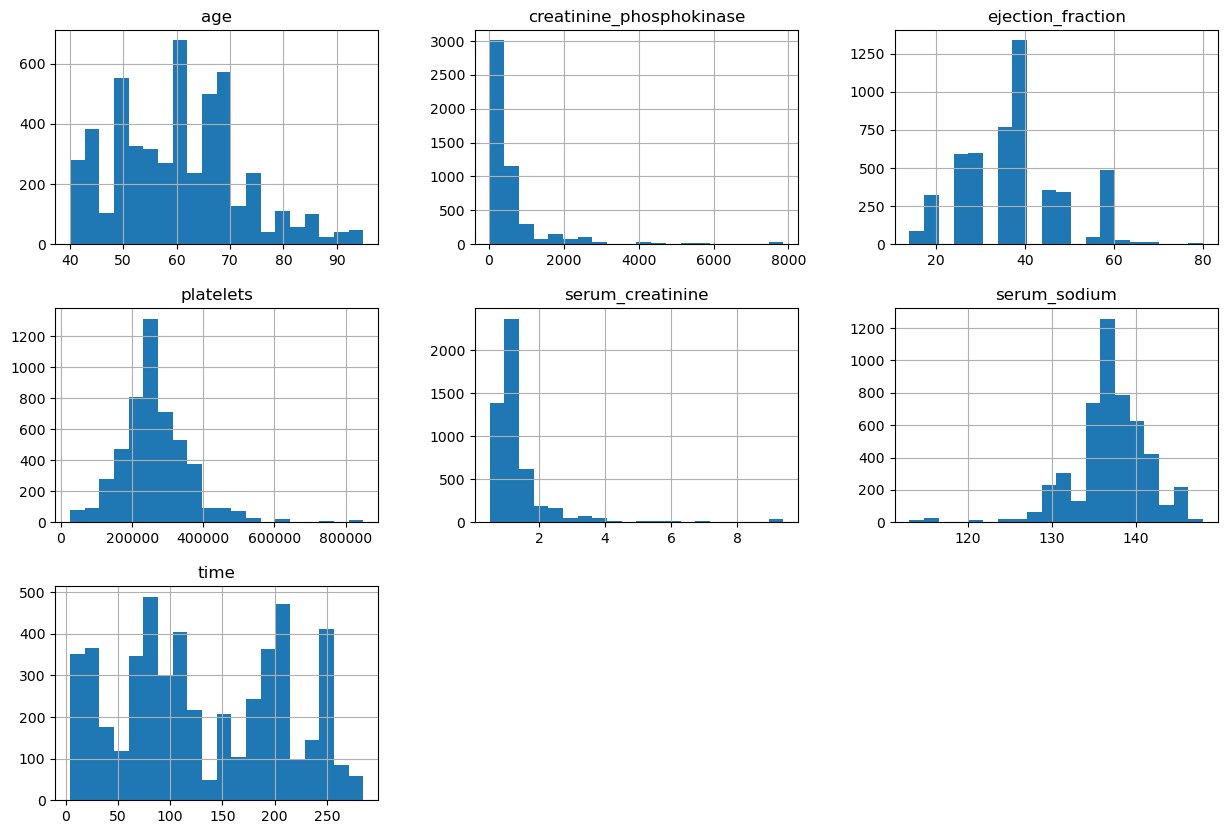

In [6]:
# Perform basic statistical analysis and visualization to understand the distribution of each feature

#i) Histograms for continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time).

df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']].hist(bins=20,figsize=(15, 10))
plt.show()

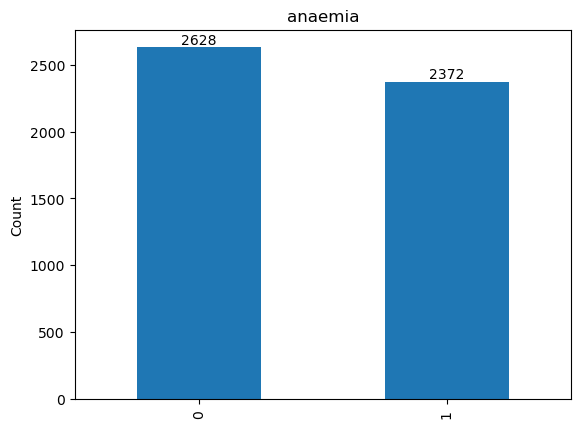

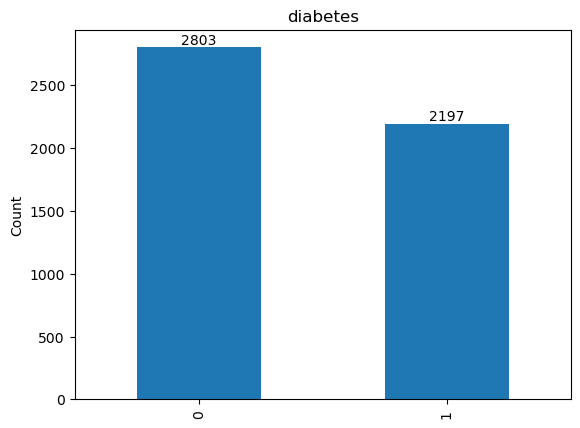

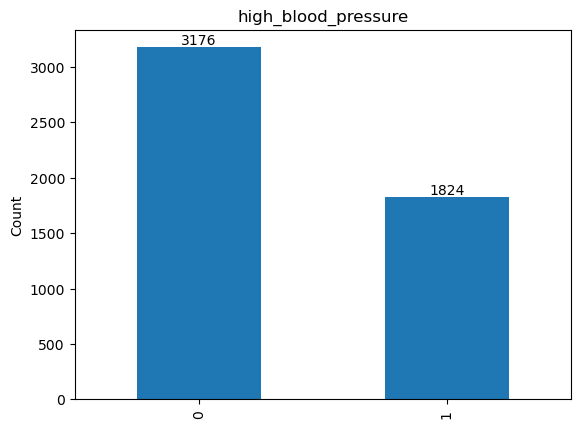

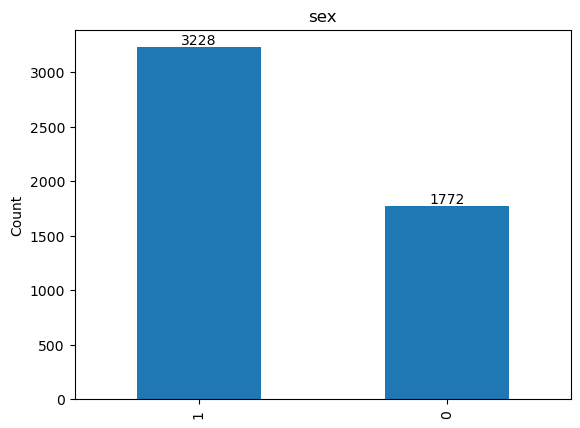

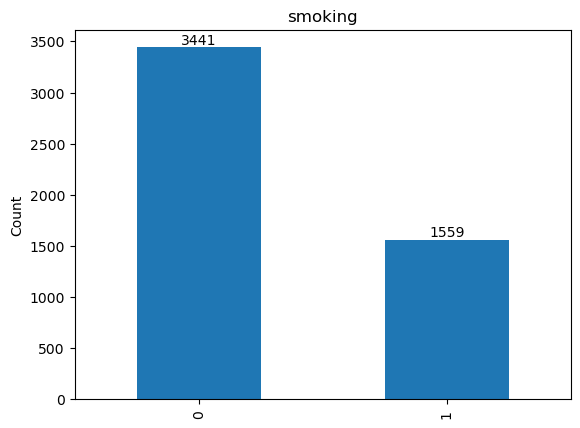

In [55]:
# Bar plots for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).

binary_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for feature in binary_features:
    ax = df[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.ylabel('Count')   # Label for the y-axis
    
    # Adding value labels on each bar
    for i in ax.containers:
        ax.bar_label(i)
    
    plt.show()


### Task 2: Feature Transformation

1. Split the dataset into training and test sets with a test size of 25%.
2. Normalize continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time) using StandardScaler.

In [23]:
# Split the dataset into training and test sets
X = df.drop('death_event',axis='columns')
y = df['death_event']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
# Normalize continuous features using StandardScaler

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
features_scale = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X_train[features_scale] = scale.fit_transform(X_train[features_scale])
X_test[features_scale] = scale.transform(X_test[features_scale])

### Task 3: Model Training and Evaluation with GaussianNB

1. Initialize and train a `GaussianNB` model using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the GaussianNB model.
4. Find the probability threshold associated with a desired recall of 85% and print the corresponding false positive rate.

In [25]:
# Initialize and train a GaussianNB model

from sklearn.naive_bayes import GaussianNB
model_gas = GaussianNB()
model_gas.fit(X_train,y_train)

GaussianNB()

In [26]:
# Print the classification report

from sklearn.metrics import classification_report
y_pred_gas = model_gas.predict(X_test)
report = classification_report(y_test,y_pred_gas)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



In [27]:
# Calculate the AUC for the GaussianNB model.

probability_gas = model_gas.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr_gas,tpr_gas,threshold_gas = roc_curve(y_test,probability_gas)
from sklearn.metrics import auc
area_gas = auc(fpr_gas,tpr_gas)
area_gas

0.8790854196850709

In [29]:
# Find the probability threshold associated with 85% recall

desired_recall = 0.85
closed_index_gas = np.argmin(abs(tpr_gas - desired_recall))
threshold_gas[closed_index_gas], fpr_gas[closed_index_gas]

(0.09000947872507015, 0.28944381384790013)

### Task 4: Model Training and Evaluation with SVM

1. Initialize and train an `SVM` model with a linear kernel using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the SVM model.
4. Find the probability threshold associated with a desired recall of 90% and print the corresponding false positive rate.

In [37]:
# Initialize and train an SVM model with a linear kernel

from sklearn.svm import SVC
model_svc = SVC(kernel='linear',probability=True)
model_svc.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [38]:
# Print the classification report
y_pred_svc = model_svc.predict(X_test)
report = classification_report(y_test,y_pred_svc)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       881
           1       0.74      0.76      0.75       369

    accuracy                           0.85      1250
   macro avg       0.82      0.82      0.82      1250
weighted avg       0.85      0.85      0.85      1250



In [39]:
# Calculate the AUC

probability_svc = model_svc.predict_proba(X_test)[:,1]
fpr_svc,tpr_svc,threshold_svc = roc_curve(y_test,probability_svc)
area_svc = auc(fpr_svc,tpr_svc)
area_svc

0.8932292387623082

In [40]:
# Find the probability threshold associated with 90% recall

desired_recall = 0.9
closed_index_svc = np.argmin(abs(tpr_svc - desired_recall))
threshold_svc[closed_index_svc],fpr_svc[closed_index_svc]

(0.18160605880020667, 0.3348467650397276)

### Task 5: Model Training and Evaluation with XGBoost

1. Initialize and train an `XGBoost` model using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the XGBoost model.

In [41]:
# Initialize and train an XGBoost model

from xgboost import XGBClassifier
model_x = XGBClassifier()
model_x.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred_x = model_x.predict(X_test)
report = classification_report(y_test,y_pred_x)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       881
           1       0.99      0.99      0.99       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



### Task 6: Summary and Conclusion

1. Plot the ROC curves for `GaussianNB, SVM, and XGBoost` models on the same chart.
2. Summarize the results and compare the performance of the models.

In [43]:
probability_x = model_x.predict_proba(X_test)[:,1]
fpr_x,tpr_x,threshold_x = roc_curve(y_test,probability_x)
area_x = auc(fpr_x,tpr_x)
area_x

0.9991971429362421

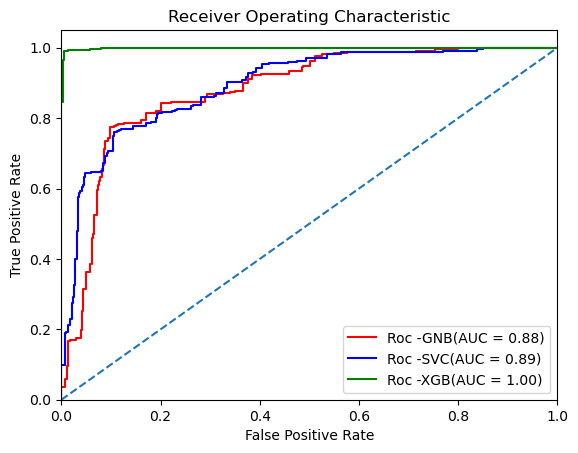

In [54]:
# Plot the ROC curves for all models
plt.figure()
plt.plot(fpr_gas,tpr_gas,color="Red",label="Roc -GNB(AUC = %0.2f)"% area_gas)
plt.plot(fpr_svc,tpr_svc,color="blue",label="Roc -SVC(AUC = %0.2f)"% area_svc)
plt.plot(fpr_x,tpr_x,color="green",label="Roc -XGB(AUC = %0.2f)"% area_x)
plt.plot([0,1],[0,1],linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()


### Conclusion

From the results, we can draw the following conclusions based on the performance metrics achieved by each model:

1. GaussianNB Model:
    - Accuracy: 0.80
    - AUC: 0.88
    - Provides a baseline performance with a recall of 47% for the positive class.

2. SVM Model:
    - Accuracy: 0.85
    - AUC: 0.89
    - Shows improvement over GaussianNB, achieving a recall of 76% for the positive class.
   
3. XGBoost Model:
    - Accuracy: 0.99
    - AUC: 1.00
    - Outperforms other models, providing superior performance and generalization.
      
In summary, while GaussianNB and SVM models provide reasonable performance, XGBoost models achieve higher accuracy and AUC, making them more suitable for this classification task. XGBoost, in particular, shows the best overall performance, making it the ideal choice for the heart failure prediction problem.